In [1]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [2]:
seed = 21

In [3]:
import os
import cv2
from PIL import Image
import numpy as np

def load_data(path_to_class_folders):
  x_data = []
  y_data = []
  for i, class_folder in enumerate(os.listdir(path_to_class_folders)):
    for image_file in os.listdir(os.path.join(path_to_class_folders, class_folder)):
        if(image_file != '.ipynb_checkpoints'):
          # using pillow, for reading the image and converting to a NumPy-Array
          image = np.array(Image.open(os.path.join(path_to_class_folders, class_folder, image_file)))
          image = cv2.resize(image,(32,32)) 
          x_data.append(image)
          y_data.append(i)
  x_data = np.array(x_data)
  y_data = np.array(y_data)
  return x_data, y_data

In [4]:
#from keras.datasets import cifar10
# Loading in the data
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()


X_train, y_train = load_data('./output')
X_test, y_test = load_data('./output')

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [7]:
model = keras.Sequential()

In [8]:
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [9]:
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
4/4 [==============================] - 2s 205ms/step - loss: 2.6312 - accuracy: 0.1650 - val_loss: 2.2892 - val_accuracy: 0.2233
Epoch 2/25
4/4 [==============================] - 1s 147ms/step - loss: 2.1364 - accuracy: 0.2573 - val_loss: 2.2797 - val_accuracy: 0.2039
Epoch 3/25
4/4 [==============================] - 1s 144ms/step - loss: 2.2506 - accuracy: 0.2330 - val_loss: 2.2725 - val_accuracy: 0.1359
Epoch 4/25
4/4 [==============================] - 1s 141ms/step - loss: 2.1518 - accuracy: 0.2913 - val_loss: 2.2724 - val_accuracy: 0.0922
Epoch 5/25
4/4 [==============================] - 1s 146ms/step - loss: 1.9850 - accuracy: 0.3155 - val_loss: 2.2759 - val_accuracy: 0.0922
Epoch 6/25
4/4 [==============================] - 1s 146ms/step - loss: 1.8933 - accuracy: 0.3447 - val_loss: 2.2840 - val_accuracy: 0.0922
Epoch 7/25
4/4 [==============================] - 1s 146ms/step - loss: 1.9191 - accuracy: 0.2670 - val_loss: 2.2937 - val_accuracy: 0.0922
Epoch 8/25
4/4 [====

In [10]:
model.evaluate(X_test, y_test, verbose=0)

[2.4296977519989014, 0.1116504818201065]

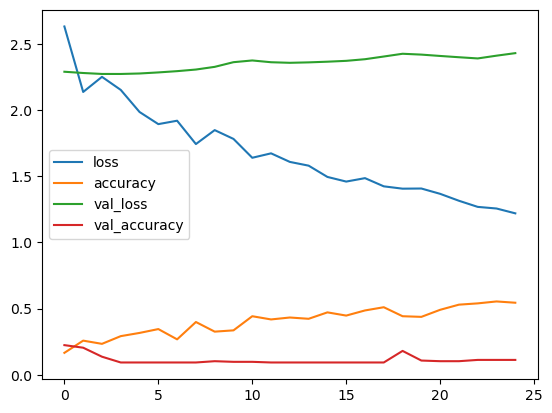

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

# Berechnen von Vorhersagen für Testdaten
# Calculating predictions for testdata
predictions = model.predict(X_test)

# Converting of predictions and classes in vectors and single values
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculating of confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
# Row stands for the available class and columns for the right assigned class
print(confusion_matrix)

7/7 [==============================] - 0s 13ms/step
[[ 0  0 19  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]]
